**Demo 1 using Fashion MNIST Dataset**

In [1]:
# We'll start by importing some libraries
import numpy as np # Very helpful (and popular!) for mathematical computation
import torch # The main deep learning library we'll use (there are others...)
import torchvision # Specialized for vision tasks such as recognizing digits
import matplotlib.pyplot as plt # Helpful for plotting things (like our images!)

Loading fashion MNIST dataset

In [2]:
# Load train and test data

trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/', train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/', train=False,download=True,transform=torchvision.transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 17034793.15it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274445.34it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5084219.67it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19540522.16it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



Let's take a look at how much training and test data we have.

In [3]:
print(f'There are {len(trainingdata)} training images.')
print(f'There are {len(testdata)} test images.')

There are 60000 training images.
There are 10000 test images.


That's a lot! But perfect for our favorite big data, deep learning setting. Let's look inside to see one of these examples.

In [4]:
image, label = trainingdata[0]
print(image.shape) # A 1x28x28 image. This means one color and on a grid of 28x28 pixels.
print(label) # A single number corresponding to the label of this image.

torch.Size([1, 28, 28])
9


We can't directly plot the image because of formatting constraints that the first dimension can't have a size of 1. Instead, we'll use the `squeeze` function to turn it into a 28x28 image that we can plot.

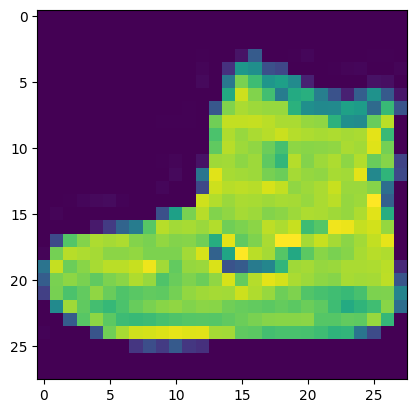

In [5]:
plt.imshow(image.squeeze()) # Plot the 28x28 image
plt.show()

Let's define a handy way of loading the data.

In [6]:
# The DataLoader is a nifty class for wrapping the data so we can load batches easily
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

images, labels = next(iter(trainDataLoader)) # Let's take a look at an example batch
print(images.shape) # There are 64 images
print(labels.shape) # And the corresponding 64 labels

torch.Size([64, 1, 28, 28])
torch.Size([64])


Now that we have our data, let's define our model, loss function, and optimizer using our three step recipe for machine learning.

In [7]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # First hidden layer with 256 neurons
        self.fc2 = nn.Linear(256, 128)    # Second hidden layer with 128 neurons
        self.fc3 = nn.Linear(128, 64)     # Third hidden layer with 64 neurons
        self.fc4 = nn.Linear(64, 10)      # Output layer with 10 neurons for classification

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input from 28x28 to 784
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to the first hidden layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation to the second hidden layer
        x = torch.relu(self.fc3(x))  # Apply ReLU activation to the third hidden layer
        x = self.fc4(x)  # Output layer
        return x

# Step 1: Create the model
model = Model()

# Step 2: Define the loss function
loss = nn.CrossEntropyLoss()

# Step 3: Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)




We also want to run everything quickly on a GPU. A GPU enables us to (basically) to matrix multiplication fast.

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'We\'re using the {device}.')
# Put the model on the device
model = model.to(device)

We're using the cuda.


Now let's do some training!! We'll treat the training process as a bit of a black box for now.

As we go, we'll keep track of the training and test loss so we can visualize how they change later.

In [9]:
train_losses = []
test_losses = []

for epoch in range(25): # We'll train for 5 "epochs"
  train_loss = 0
  test_loss = 0

  # Evaluation process
  for i, data in enumerate(testDataLoader):
    images, labels = data # Unpack the data into the images and labels
    images, labels = images.to(device), labels.to(device) # Put on device
    predicted_output = model(images) # Apply our network to the images
    fit = loss(predicted_output, labels) # Measure how well the predicted output matches the labels
    test_loss += fit.item() # Add the fit to the loss for tracking purposes

  # Training process
  for i, data in enumerate(trainDataLoader):
    images, labels = data # Unpack the data into the images and labels
    images, labels = images.to(device), labels.to(device) # Put on device
    optimizer.zero_grad() # Zero out the gradient values
    predicted_output = model(images) # Apply our network to the images
    fit = loss(predicted_output, labels) # Measure how well the predicted output matches the labels
    fit.backward() # Compute the gradient of the fit with respect to the model parameters
    optimizer.step() # Update the weights in the model using gradient descent
    train_loss += fit.item() # Add the fit to the loss for tracking purposes

  # Add the current losses to our tracking lists
  train_losses += [train_loss/len(trainDataLoader)]
  test_losses += [test_loss/len(testDataLoader)]

  # Print the current loss
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')

Epoch 0, Train loss 1727.3545330166817, Test loss 362.1974289417267
Epoch 1, Train loss 803.6327338814735, Test loss 170.73893213272095
Epoch 2, Train loss 640.9106209874153, Test loss 120.69214868545532
Epoch 3, Train loss 567.1938232183456, Test loss 102.614536434412
Epoch 4, Train loss 522.3575262725353, Test loss 112.55262008309364
Epoch 5, Train loss 490.9789659976959, Test loss 91.36244958639145
Epoch 6, Train loss 466.2319046407938, Test loss 84.91656944155693
Epoch 7, Train loss 445.09929390251637, Test loss 87.89059269428253
Epoch 8, Train loss 428.94404873251915, Test loss 82.1755399107933
Epoch 9, Train loss 415.8034529387951, Test loss 76.40750846266747
Epoch 10, Train loss 404.05214984714985, Test loss 77.41713863611221
Epoch 11, Train loss 393.6788412630558, Test loss 73.10791577398777
Epoch 12, Train loss 382.90175135433674, Test loss 69.37548460066319
Epoch 13, Train loss 377.4120763093233, Test loss 72.21525743603706
Epoch 14, Train loss 368.36826483905315, Test loss 6

**Plotting train and test Loss vs epochs**

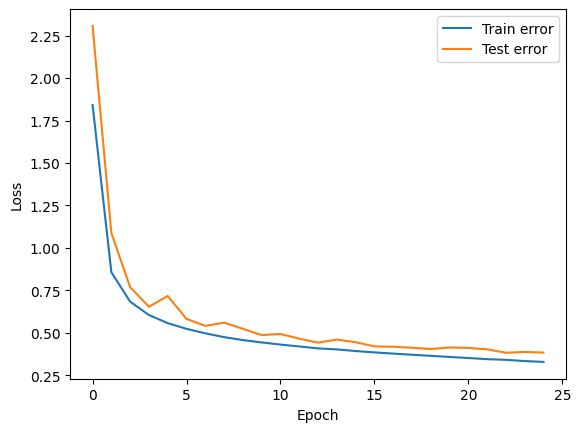

In [10]:
plt.plot(range(25),train_losses, label='Train error')
plt.plot(range(25),test_losses, label='Test error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Let's look at an example to see how well the model does. We'll use the variables from the last pass of the training process.

In [11]:
predicted_classes = torch.max(predicted_output, 1)[1]
print('Predicted:', predicted_classes)
print('Labels:', labels)


Predicted: tensor([2, 7, 8, 5, 6, 5, 6, 5, 9, 2, 3, 3, 5, 3, 6, 1, 3, 6, 6, 3, 6, 0, 6, 2,
        5, 1, 3, 2, 0, 7, 9, 4], device='cuda:0')
Labels: tensor([2, 7, 8, 5, 0, 5, 6, 5, 9, 2, 4, 3, 5, 3, 6, 1, 6, 6, 6, 3, 4, 0, 6, 2,
        5, 1, 3, 2, 0, 7, 9, 4], device='cuda:0')


Predicted: 5
Labels: 5


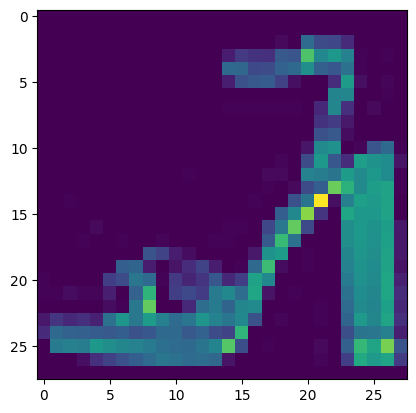

In [12]:
i = 5
print('Predicted:', predicted_classes[i].item())
print('Labels:', labels[i].item())
plt.imshow(images[i].squeeze().cpu()) # Visualize iamge
plt.show()

Random sampling from test data of 3 datapoints and visualizing probability distrubution for each sample

 Probability values: tensor([[4.2715e-03, 8.6439e-05, 4.0099e-03, 8.0646e-04, 2.8411e-02, 2.6288e-06,
         2.5030e-02, 9.6806e-06, 9.3736e-01, 1.0682e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


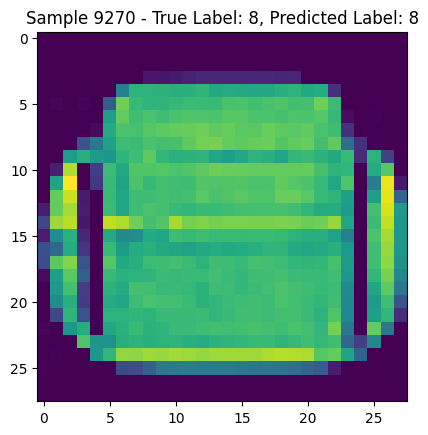

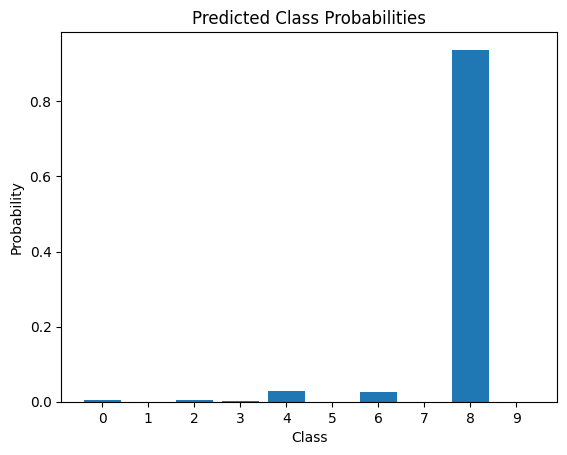

--------------------------------------------------------------------------------------------------------------------
 Probability values: tensor([[6.3994e-06, 3.2346e-06, 1.8729e-02, 9.5252e-06, 8.9233e-01, 1.7414e-06,
         8.8100e-02, 6.4457e-10, 8.2018e-04, 5.5695e-12]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


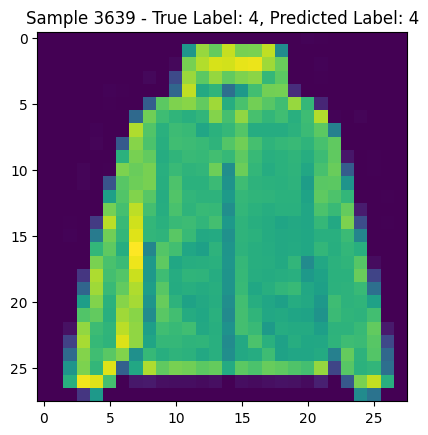

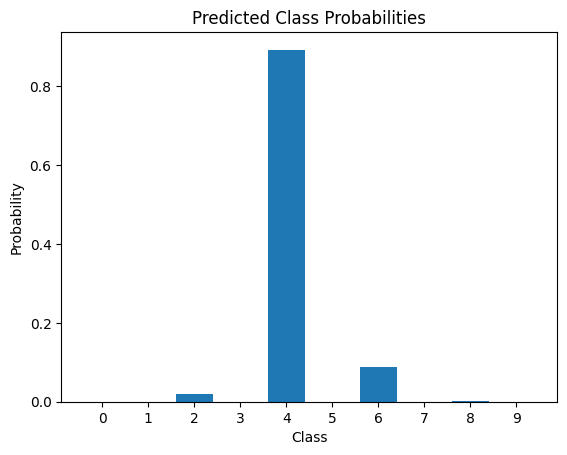

--------------------------------------------------------------------------------------------------------------------
 Probability values: tensor([[4.0163e-05, 1.4879e-06, 1.0759e-05, 4.8009e-06, 3.4188e-06, 9.9946e-01,
         1.1498e-04, 7.7425e-05, 2.3312e-04, 5.7643e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


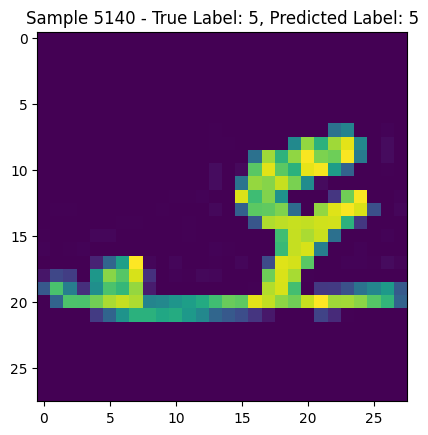

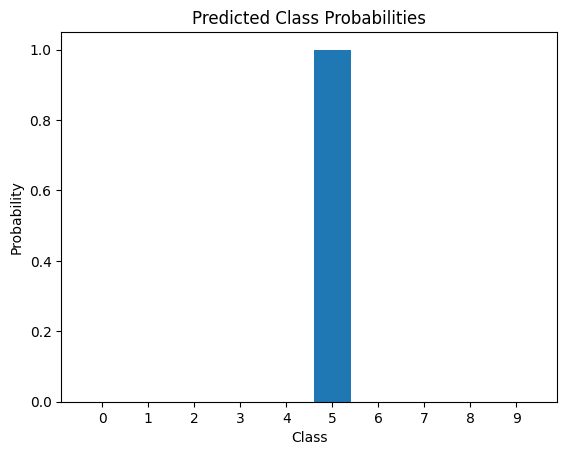

--------------------------------------------------------------------------------------------------------------------


In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

# Define the number of samples you want to randomly select
num_samples = 3

# Load FashionMNIST test dataset
testdata = torchvision.datasets.FashionMNIST(
    './FashionMNIST/', train=False, download=True, transform=transforms.ToTensor())

# Create a list of indices from 0 to len(testdata) - 1
indices = list(range(len(testdata)))

# Randomly shuffle the indices
random.shuffle(indices)

# Select the first 'num_samples' indices from the shuffled list
sampled_indices = indices[:num_samples]

# Loop over the sampled indices to process the images
for i in sampled_indices:
    image, label = testdata[i]
    image = image.unsqueeze(0)  # Add batch dimension (1, C, H, W)

    # Transfer the image to the device if needed
    image = image.to(device)

    # Get predicted output from your model
    predicted_output = model(image)

    # Calculate class probabilities
    predicted_probs = torch.softmax(predicted_output, dim=1)

    print(" Probability values:", predicted_probs)


    # Get the predicted class
    predicted_class = torch.argmax(predicted_output, dim=1).item()

    # Display the input image
    plt.imshow(image.squeeze().cpu()) # Visualize iamge
    plt.title(f"Sample {i + 1} - True Label: {label}, Predicted Label: {predicted_class}")

    # Create a bar graph for class probabilities
    classes = list(range(10))  # Assuming 10 classes for FashionMNIST
    plt.figure()
    plt.bar(classes, predicted_probs.squeeze().tolist())
    plt.xticks(classes)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Predicted Class Probabilities')

    plt.show()

    print('----------------------------------------------------------'*2)


Comment:

In sample 9270, class 8 clearly has a higher probability prediction than rest of the classes

In sample 3639, class 4 clearly has a higher probability prediction than rest of the classes

In sample 5140, class 5 clearly has a higher probability prediction than rest of the classes

This is true as when one probability is high, other classes must be low since they add upto 1.

In our sample space, there is no confusion between classifying classes. clearly one class dominates others. which can be a good sign since this means test loss is low atleast for this sample space.



